# Importing Libraries

In [1]:
# pandas, Version-1.3.4
# numpy, Version-1.20.3
# seaborn, Version-0.11.2
# matplotlib, Version-3.4.3
# sklearn, Version-1.0.2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [8]:
# Thus no null values in the dataset

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
# We can see that all three columns have a direct relationship with the profit, which is our target variable.

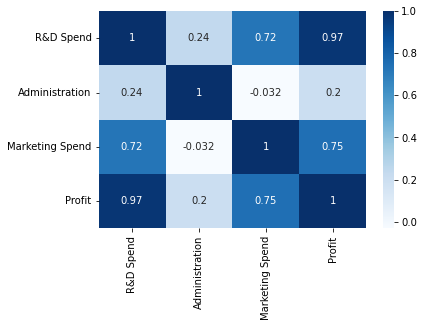

In [11]:
#Correlation Matrix
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [12]:
#We can see that R&D Spend and Marketing Spend are highly correlated with profit.

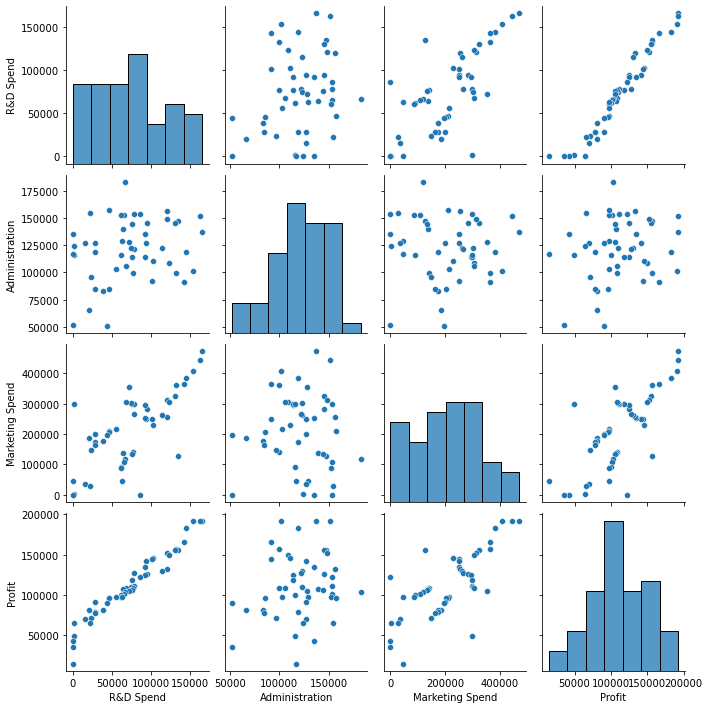

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
# 1. Research and development are directly proportional to the profit.
# 2. The marketing spend seems to be directly proportional with the profit.
# 3. There is no relationship between the second column and profit i.e. our target column

<AxesSubplot:>

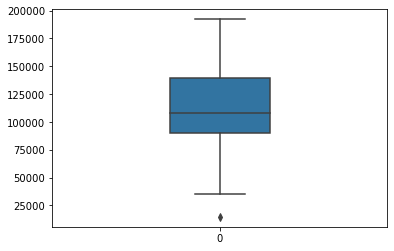

In [15]:
#Checking for outliers in profit

sns.boxplot(data = df['Profit'], width = 0.3)

In [16]:
#Since the dataset is small the single outlier wont have a significant effect

<AxesSubplot:xlabel='Profit', ylabel='Density'>

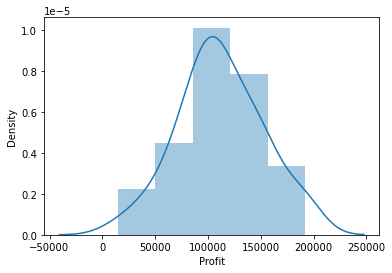

In [17]:
#Distribution of Profit

sns.distplot(df['Profit'], bins = 5, kde = True)

In [18]:
var = list(df.columns)[0:3]
var

['R&D Spend', 'Administration', 'Marketing Spend']

In [19]:
## Dividing the  dataset into independent and dependent features
X = df.iloc[:,:-1]##independent features
y = df.iloc[:,-1]## dependent features


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Scaling the dataset
df[var] = scaler.fit_transform(df[var])

In [21]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.head()

,R&D Spend,Administration,Marketing Spend
6,0.814128,0.730161,0.270710
41,0.168691,0.254469,0.348614
46,0.007956,0.491260,0.629768
47,0.000000,0.640547,0.000000
15,0.692617,0.543030,0.554864


In [23]:
y_train.head()

6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
Name: Profit, dtype: float64

In [24]:
#Number of rows in test set
num = range(15)

# Linear Rgression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score

In [26]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [27]:
mse=cross_val_score(lr_reg,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
mean_mse=np.mean(mse)
print(mean_mse)

-7797.134347326867


In [28]:
y_pred_1 = lr_reg.predict(X_test)

In [29]:
r2_score(y_pred_1, y_test)

0.9355141378867275

<BarContainer object of 15 artists>

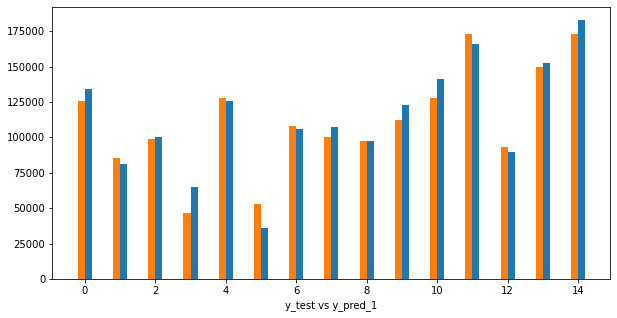

In [85]:
plt.figure(figsize = (10,5))
plt.xlabel('y_test vs y_pred_1')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_1, width = -0.2,  align = 'edge')

# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
rg_reg = Ridge(alpha = 10)

rg_reg.fit(X_train, y_train)

Ridge(alpha=10)

In [33]:
y_pred_2 = rg_reg.predict(X_test)

In [34]:
r2_score(y_pred_2, y_test)

-4.532362987388155

In [35]:
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [36]:
ridge_regressor = GridSearchCV(rg_reg,param_grid = params,scoring='neg_mean_absolute_error',cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(alpha=10),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_absolute_error')

In [37]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-7797.134347326877


In [38]:
y_pred_3 = ridge_regressor.predict(X_test)

In [39]:
r2_score(y_pred_3, y_test)

0.9355141378867275

<BarContainer object of 15 artists>

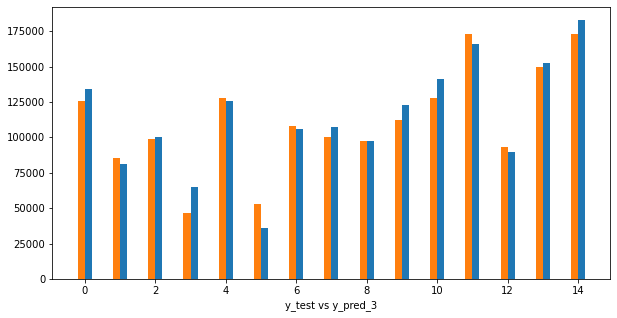

In [40]:
plt.figure(figsize = (10,5))

plt.xlabel('y_test vs y_pred_3')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_3, width = -0.2,  align = 'edge')

# Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
ls_reg = Lasso(alpha = 10)

ls_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [44]:
y_pred_4 = ls_reg.predict(X_test)

In [45]:
r2_score(y_pred_4, y_test)

0.9359378638858649

In [46]:
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [47]:
lasso_regressor = GridSearchCV(ls_reg,param_grid = params,scoring='neg_mean_absolute_error',cv=10)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=10),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_absolute_error')

In [48]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-7757.09502286332


In [49]:
y_pred_5 = lasso_regressor.predict(X_test)

In [50]:
r2_score(y_pred_5, y_test)

0.9394555827532998

<BarContainer object of 15 artists>

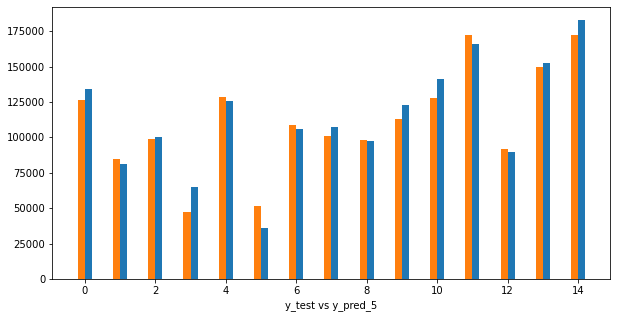

In [86]:
plt.figure(figsize = (10,5))
plt.xlabel('y_test vs y_pred_5')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_5, width = -0.2,  align = 'edge')

# Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
y_pred_6 = dt_reg.predict(X_test)

In [55]:
r2_score(y_pred_6, y_test)

0.803620037776327

In [56]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [57]:
decisiontree_regressor = GridSearchCV(dt_reg, param_grid = parameters, scoring='neg_mean_absolute_error',cv=3)
decisiontree_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [58]:
y_pred_7 = decisiontree_regressor.predict(X_test)

In [59]:
r2_score(y_pred_7, y_test)

0.7916872918533818

<BarContainer object of 15 artists>

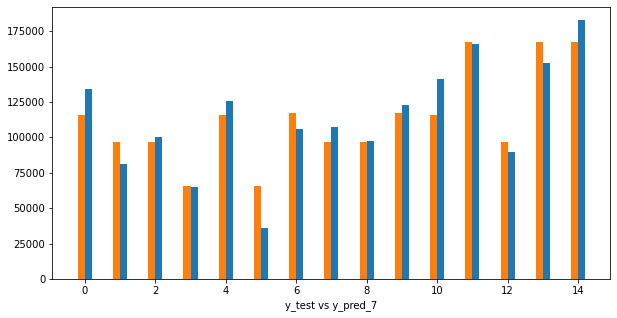

In [87]:
plt.figure(figsize = (10,5))
plt.xlabel('y_test vs y_pred_7')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_7, width = -0.2,  align = 'edge')

# Support Vector Regression

In [61]:
from sklearn.svm import SVR

In [62]:
sv_reg = SVR(epsilon = 0.01)

sv_reg.fit(X_train, y_train)

SVR(epsilon=0.01)

In [63]:
y_pred_8 = sv_reg.predict(X_test)

In [64]:
r2_score(y_pred_8, y_test)

-59085280.96121584

In [65]:
parameters = [{'kernel': ['rbf'], 
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': [1, 10, 100, 1000, 10000]}]

In [66]:
supportvector_regression = GridSearchCV(SVR(epsilon = 0.01), parameters, scoring='neg_mean_absolute_error' , cv = 10)
supportvector_regression.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(epsilon=0.01),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error')

In [67]:
y_pred_9 = supportvector_regression.predict(X_test)

In [68]:
r2_score(y_pred_9, y_test)

0.27117572408083057

<BarContainer object of 15 artists>

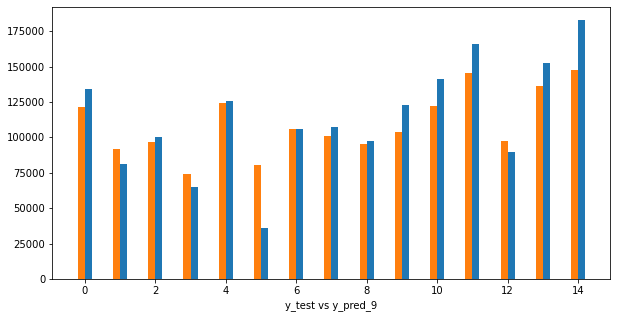

In [88]:
plt.figure(figsize = (10,5))
plt.xlabel('y_test vs y_pred_9')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_9, width = -0.2,  align = 'edge')

# Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
randomforest_reg = RandomForestRegressor()
randomforest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred_10 = randomforest_reg.predict(X_test)

In [73]:
r2_score(y_pred_10, y_test)

0.9290534086116076

In [74]:
parameters = {'bootstrap': [True, False],
 'max_depth': [8,9,10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,20,30]}

In [75]:
randomforest_regressor = GridSearchCV(randomforest_reg, param_grid = parameters, scoring='neg_mean_absolute_error', cv = 10)

In [76]:
randomforest_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [8, 9, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_absolute_error')

In [77]:
y_pred_11 = randomforest_regressor.predict(X_test)

In [78]:
r2_score(y_pred_11, y_test)

0.9159453497010054

<BarContainer object of 15 artists>

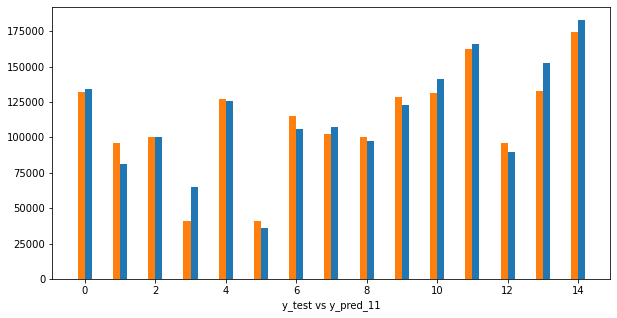

In [89]:
plt.figure(figsize = (10,5))
plt.xlabel('y_test vs y_pred_11')
plt.bar(num, y_test, width = 0.2, align = 'edge')
plt.bar(num, y_pred_11, width = -0.2,  align = 'edge')

In [83]:
values = pd.DataFrame({'Model':['Linear Rgresssion', 'Ridge Rgression', 'Lasso Regression', 'Decision Tree Regression', 'Support Vector Regression', 'Random Forest Regression'], 
                       'R2 Scores' : [0.9355141378867275, 0.9355141378867275, 0.9394555827532998, 0.7916872918533818, 0.27117572408083057, 0.9159453497010054]})

In [84]:
values

,Model,R2 Scores
0,Linear Rgresssion,0.935514
1,Ridge Rgression,0.935514
2,Lasso Regression,0.939456
3,Decision Tree Regression,0.791687
4,Support Vector Regression,0.271176
5,Random Forest Regression,0.915945


In [82]:
#Obviously Lasso Regression is the best model to be choosen for Profit prediction